<a href="https://colab.research.google.com/github/Athotakb88/CodSoft-DataScience-Internship/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Movie Rating Prediction using Machine Learning
## Internship Project – CodSoft Data Science

##Problem Statement
#Objective
To build a machine learning regression model that predicts the rating of a movie based on its features such as genre, director, actors, and other attributes.

##Type of Problem

Regression problem
Output variable (rating) is continuous numeric data

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
!ls /content

movies.csv  sample_data


In [7]:
!head /content/movies.csv

Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
 ,,,Drama,,,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
#Homecoming,(2021),90 min,"Drama, Musical",,,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
...And Once Again,(2010),105 min,Drama,,,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
.in for Motion,(2008),59 min,Documentary,,,Anirban Datta,,,
?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
#Load the Dataset

data = pd.read_csv("/content/movies.csv",encoding='latin-1')
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
data.shape

(15509, 10)

In [12]:
#Understand Dataset Structure

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
#Statistical Summary of Data
data.describe()

In [13]:
#Check Missing Values
data.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [14]:
#Handle Missing Values
data.dropna(inplace=True)


In [15]:
#Encode Categorical Features
#Why Encoding?

#ML algorithms work with numbers, not text.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])



In [17]:
#Feature Selection
X = data.drop("Rating", axis=1)
y = data["Rating"]


In [18]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model Selection & Training

In [19]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
#Make Predictions
y_pred = model.predict(X_test)


In [21]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.722161516982778
R2 Score: 0.06997843865652542


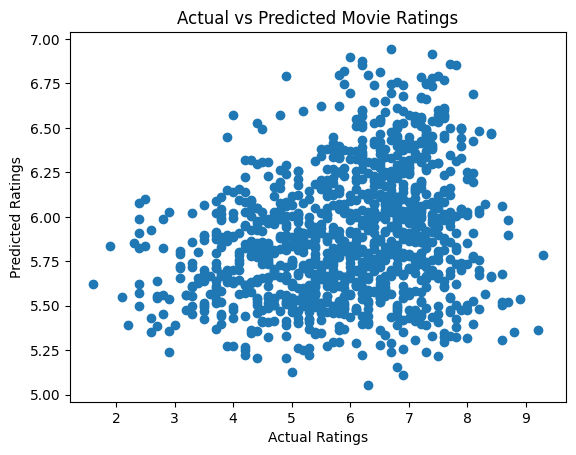

In [22]:
#Visualization
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()


#Final Conclusion
### Conclusion
In this project, a movie rating prediction system was developed using machine learning regression techniques.
After preprocessing the data and encoding categorical variables, a regression model was trained and evaluated.
The results show that machine learning can effectively predict movie ratings based on historical movie data.
